
#💼Predicting passenger in-flight satisfaction (portfolio)

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#00b3ff;
           font-size:300%;
           font-family:Verdana;   
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:left">Predicting the level of passenger satisfaction with the flight
🎯</p>
</div>

<p style="text-align:center;"><img src="https://image.cnbcfm.com/api/v1/image/106918717-1627558728211-gettyimages-1233035475-778823_NA-0521-AIRTRAVEL_KKN_10920JPG.jpeg?v=1627558770&w=740&h=416" width="500" height="350">

The passenger is always the best customer group for the airline company because they are one of the main income of the company.
    
Analyzing their feedback helps airlines understand exactly what a passenger needs. In this way, the airline can find out which aspects need to be improved.
    
More importantly, predicting passenger satisfaction also helps CRM in airlines…
    
Plan:

* Determining the relationship between passenger satisfaction and all other characteristics.

* Selection of the best `prediction models` to predict passenger satisfaction

* estimation of high correlation factors through excellent performance models.

Import libraries:

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,plot_roc_curve, roc_curve, precision_score, recall_score, f1_score, accuracy_score, jaccard_score, classification_report

warnings.filterwarnings("ignore")


##Train dataset:

In [ ]:
# train data
df_train = pd.read_csv('train_dataset.csv', index_col=0)
# test data
df_test = pd.read_csv('test_dataset.csv', index_col=0)
# sample_submission data
ss_df = pd.read_csv('sample_submission.csv', index_col=0)

The following dataset shows the level of satisfaction of passengers with certain services. Our task is to determine (predict) their level of satisfaction with the flight using this information.

### Content:

`Gender`: gender of passengers (female, male)

`Customer Type`: customer type (loyal customer, non-loyal customer)

`Age`: actual age of passengers

`Type of Travel`: the purpose of the passenger flight (personal travel, business travel)

`Class`: class of travel on a passenger plane (Business, Eco, Eco Plus)

`Flight distance`: The flight distance of this trip

``Inflight wifi service``: Level of satisfaction with the in-flight Wi-Fi service (0: Not applicable; 1-5)

`Departure/Arrival time convenien`': Satisfaction level of departure/arrival time

``Ease of Online booking``: Level of satisfaction with online booking

`Gate location`: Level of satisfaction with gate location

``Food and drink``: Level of satisfaction with food and drink

``Online boarding``: Level of satisfaction with online boarding

``Seat comfort``: Level of satisfaction with the comfort of the seat

``Inflight entertainment``: Level of satisfaction with in-flight entertainment

``On-board service``: Level of satisfaction with the on-board service

``Leg room service``: level of satisfaction with leg room service

``Baggage handling``: level of satisfaction with baggage handling

``Check-in service``: Level of satisfaction with check-in service

``Inflight service``: Level of satisfaction with in-flight service

``Cleanliness``: Level of satisfaction with cleanliness

``Arrival Delay in Minutes``: delay

## Studying data:

about `df_train` :

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

Content of text(object) columns:

In [ ]:
# numerical columns || categorical columns:

# num columns:
numerical_columns = [k for k in df_train.columns if df_train[k].dtype.name != 'object']
numerical_columns.remove('satisfaction')

# obj columns:
categorical_columns = [k for k in df_train.columns if df_train[k].dtype.name == 'object']
df_train_describe = df_train.describe(include = 'object')

In [ ]:
df_train.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class
count,10000,10000,10000,10000
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,5169,8307,7079,5048


In [ ]:
binary_columns = [k for k in categorical_columns if df_train_describe[k]['unique'] == 2] # binary
nonbinary_columns = [k for k in categorical_columns if df_train_describe[k]['unique'] > 2] # nonbinary
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class']


### Let's look at the unique values for each of the binary columns:

In [ ]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in df_train[col].unique():
        if uniq == df_train[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : disloyal Customer, Loyal Customer.
Type of Travel : Business travel, Personal Travel.


Let's see their number:

In [ ]:
for col in binary_columns:
    k = 0
    for uniq in df_train[col].unique():
        df_train.at[df_train[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(df_train[col].describe(), end = '\n\n')

count     10000
unique        2
top           1
freq       5169
Name: Gender, dtype: int64

count     10000
unique        2
top           1
freq       8307
Name: Customer Type, dtype: int64

count     10000
unique        2
top           0
freq       7079
Name: Type of Travel, dtype: int64



### Convert categorical columns to numeric👇.

For this, either `LabelEncoder` and `replace` from `sklearn` can be used.

`.replace`

In [ ]:
Gender = {'Female': 0, 'Male':1}
travelType = {'Business travel':1,'Personal Travel':0}
Class = {'Business':2,'Eco Plus': 1,'Eco':0}
CustType = {'Loyal Customer':1,'disloyal Customer':0}

# for train data:
df_train['Gender'].replace(Gender, inplace=True)
df_train['Type of Travel'].replace(travelType, inplace=True)
df_train['Customer Type'].replace(CustType, inplace=True)
df_train['Class'].replace(Class, inplace=True)

# for test data
df_test['Gender'].replace(Gender, inplace=True)
df_test['Type of Travel'].replace(travelType, inplace=True)
df_test['Customer Type'].replace(CustType, inplace=True)
df_test['Class'].replace(Class, inplace=True)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

## correlation(in percent):

In [ ]:
df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)*100

satisfaction                         100.000000
Class                                 51.893105
Online boarding                       50.498562
Type of Travel                        48.226628
Inflight entertainment                40.089954
Seat comfort                          34.229377
On-board service                      32.642642
Leg room service                      32.436790
Cleanliness                           31.033803
Flight Distance                       29.870298
Inflight wifi service                 27.739521
Baggage handling                      24.796452
Inflight service                      24.058363
Checkin service                       23.235876
Food and drink                        20.785353
Customer Type                         18.159192
Ease of Online booking                16.466159
Age                                   14.430214
Departure/Arrival time convenient      6.763835
Arrival Delay in Minutes               4.864993
Departure Delay in Minutes             4

In [ ]:
corr_matrix = df_train.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.025020,0.004407,0.021504,0.001256,0.017786,0.010111,0.016445,0.007580,0.017967,0.004991,0.045786,0.045933,0.009528,0.004277,0.019076,0.039071,0.019710,0.048099,0.008535,0.032548,0.027431,0.002601
Customer Type,0.025020,1.000000,0.291192,0.280023,0.123456,0.226549,0.003499,0.196112,0.018328,0.000866,0.072036,0.195554,0.174279,0.126166,0.061039,0.071066,0.014837,0.032102,0.026231,0.101625,0.008944,0.006917,0.181592
Age,0.004407,0.291192,1.000000,0.075133,0.163603,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019086,0.144302
Type of Travel,0.021504,0.280023,0.075133,1.000000,0.557850,0.276756,0.099728,0.243037,0.114107,0.035903,0.077951,0.241535,0.150680,0.186244,0.080640,0.153127,0.035709,0.006062,0.038847,0.110651,0.007013,0.007061,0.482266
Class,0.001256,0.123456,0.163603,0.557850,1.000000,0.453539,0.025290,0.091019,0.089416,0.007877,0.095619,0.336912,0.245338,0.226036,0.224167,0.221653,0.179048,0.165677,0.158066,0.153413,0.001794,0.005113,0.518931
Flight Distance,0.017786,0.226549,0.110823,0.276756,0.453539,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002901,0.298703
Inflight wifi service,0.010111,0.003499,0.020904,0.099728,0.025290,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023086,0.277395
Departure/Arrival time convenient,0.016445,0.196112,0.036071,0.243037,0.091019,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008985,0.067638
Ease of Online booking,0.007580,0.018328,0.026964,0.114107,0.089416,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003715,0.164662
Gate location,0.017967,0.000866,0.012077,0.035903,0.007877,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000684,0.007169


# Visualization📈

In [ ]:
numerics = ['int64','float64']

train_con_col = df_train.select_dtypes(include = numerics).columns
train_cat_col = df_train.select_dtypes(include = "object").columns 
test_con_col = df_test.select_dtypes(include = numerics).columns
test_cat_col = df_test.select_dtypes(include = "object").columns

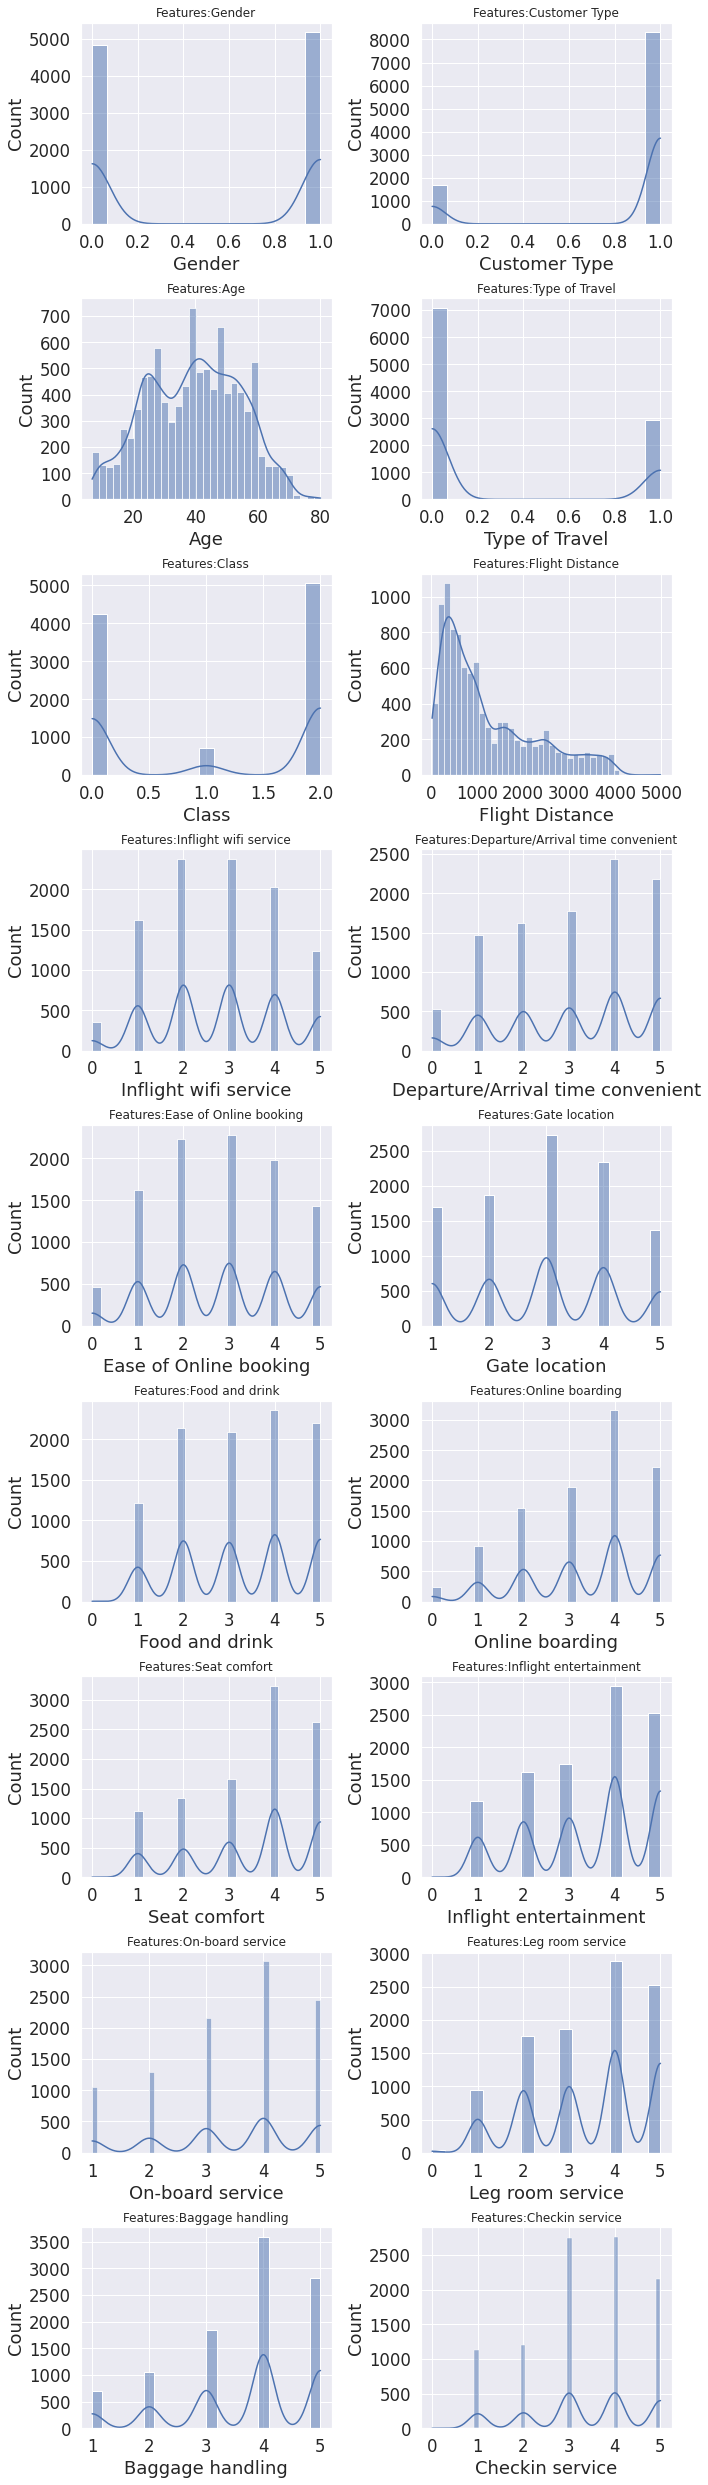

In [ ]:
fig, axs = plt.subplots(9, 2, figsize=(10, 35)) 
fig.tight_layout(pad=4.0) # for the correct placement of texts

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 1)
    ax=sns.histplot(ax=ax,data=df_train,x=df_train[f], kde=True)
    ax.set_title('Features:'+ f)

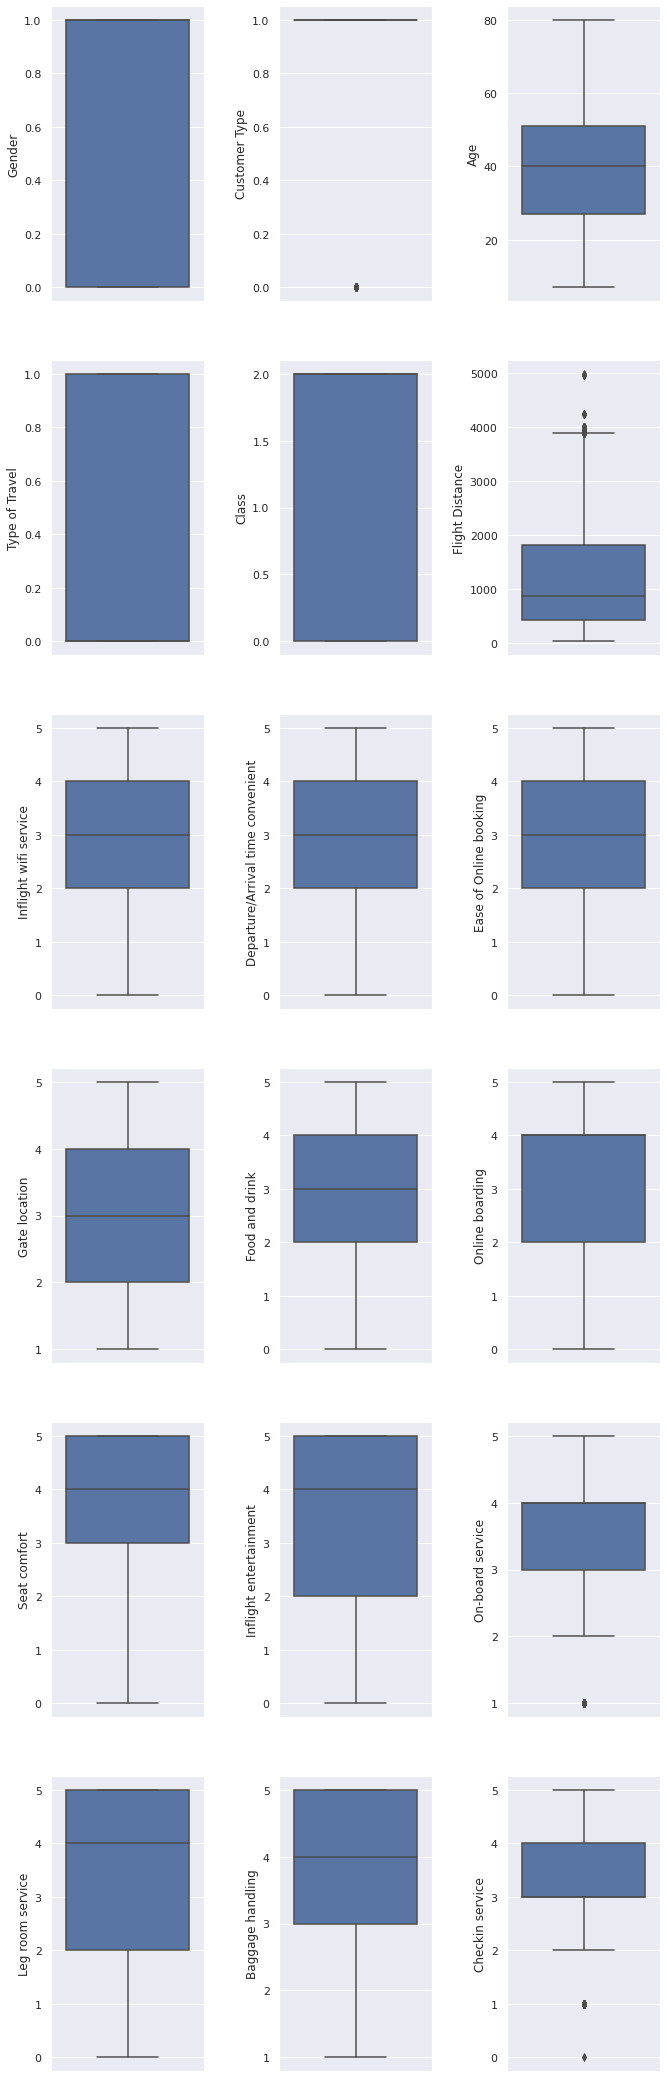

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(10,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_train,y=df_train[f])

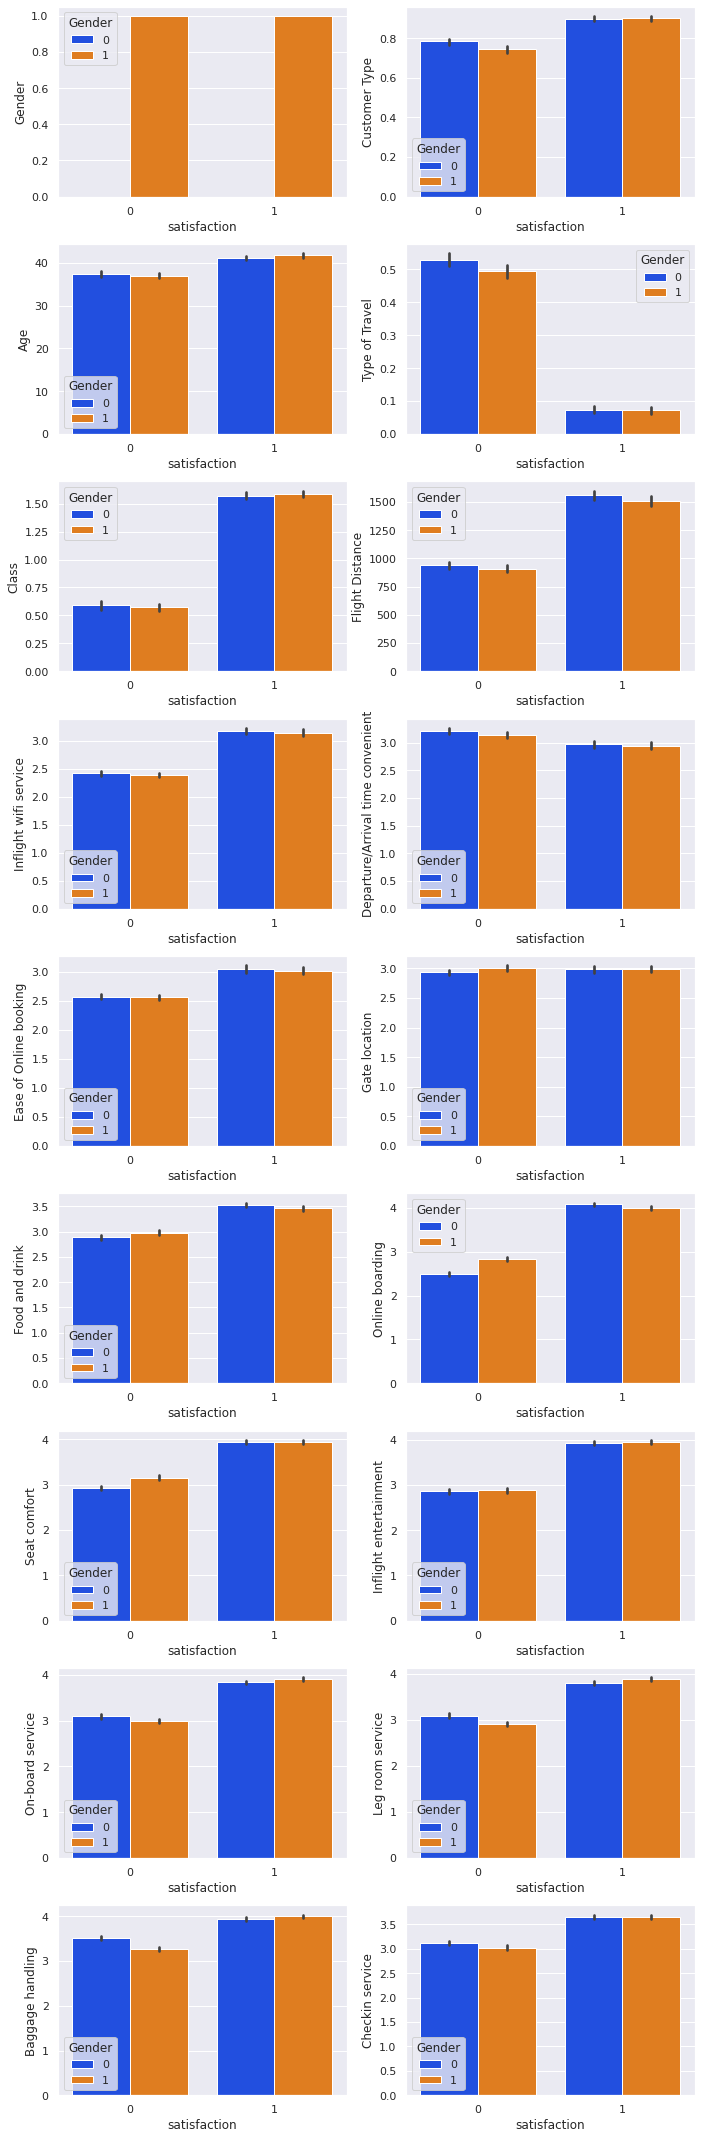

In [ ]:
def detail_barplot(category):
    fig, axs = plt.subplots(9, 2, figsize=(10,30))
    sns.set(font_scale = 1)
    fig.tight_layout(pad=2.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category, palette= 'bright', data=df_train)

detail_barplot("Gender")

Gender bo'yicha natijalarga asoslanib:

-uzoq parvoz masofasi ularni sayohatni qondirish ehtimolini oshiradi.

-Ammo o'rtacha kechikish vaqti, vaqt 12,5 daqiqadan yuqori bo'lsa, ular qoniqtirmasligi mumkin.

-Erkak va ayol o'rtasida sezilarli farqlar yo'q.

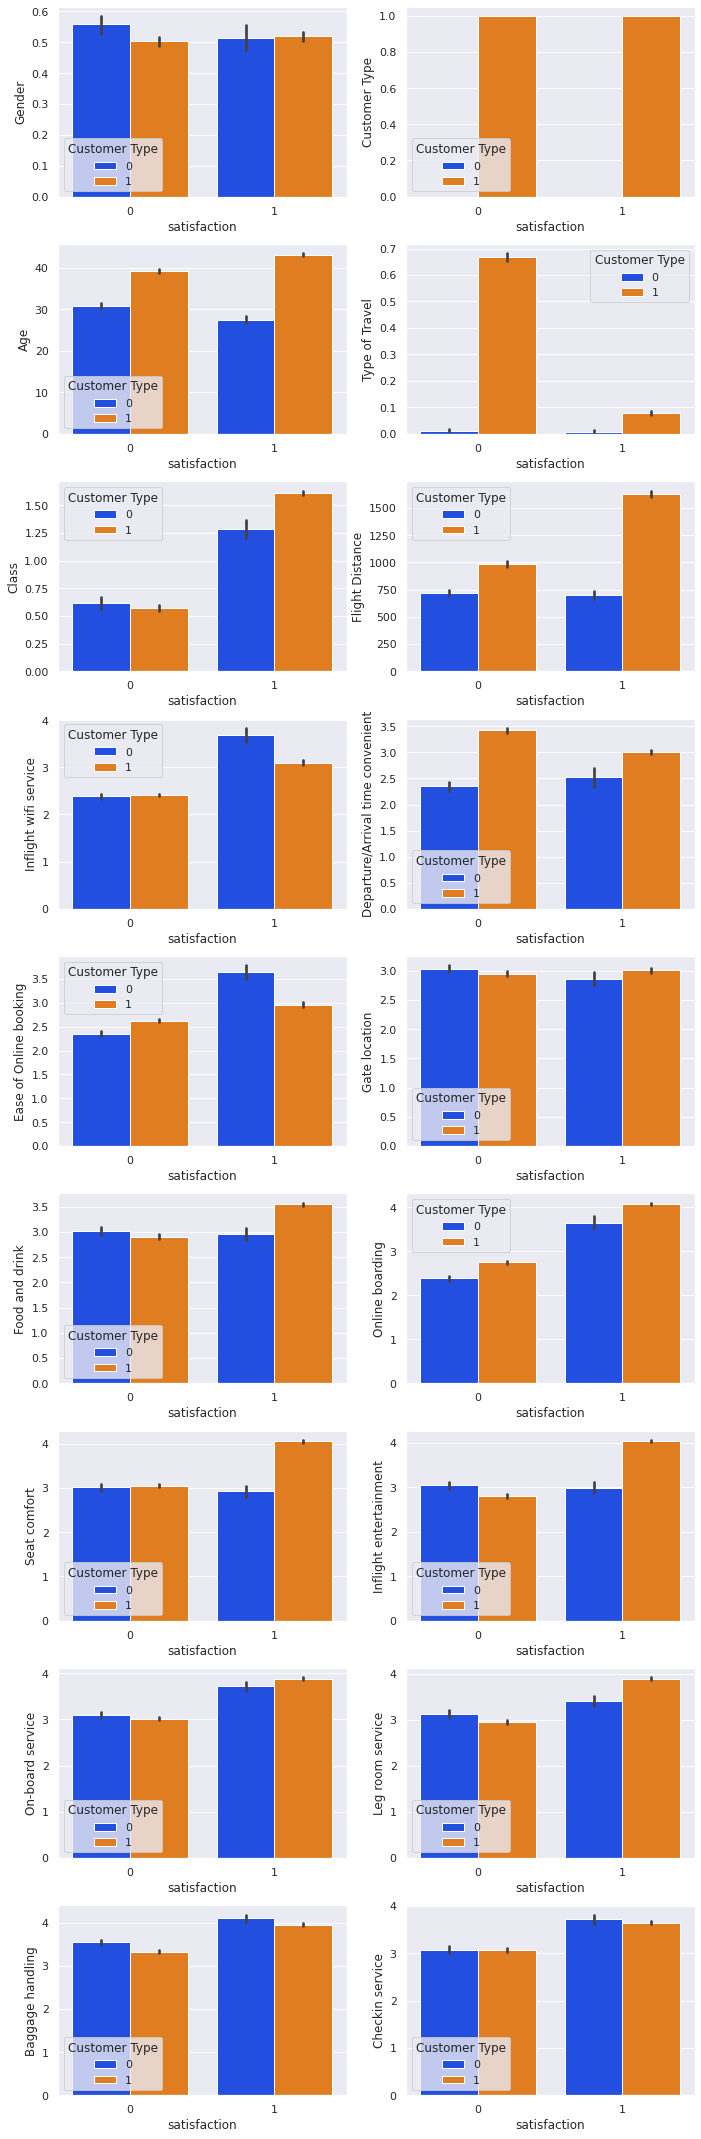

In [ ]:
detail_barplot("Customer Type")

###For a loyal customer:
Around 40 years old
  -Satisfied with the high flight distance, the comfort of the seat, the entertainment in the flight, the cleanliness.

### For a unloyal customer:
Age around 30: Satisfied with Wi-Fi service, ease of online booking.
However, when the latency minutes are 12.5 or higher, they usually feel neutral or dissatisfied.

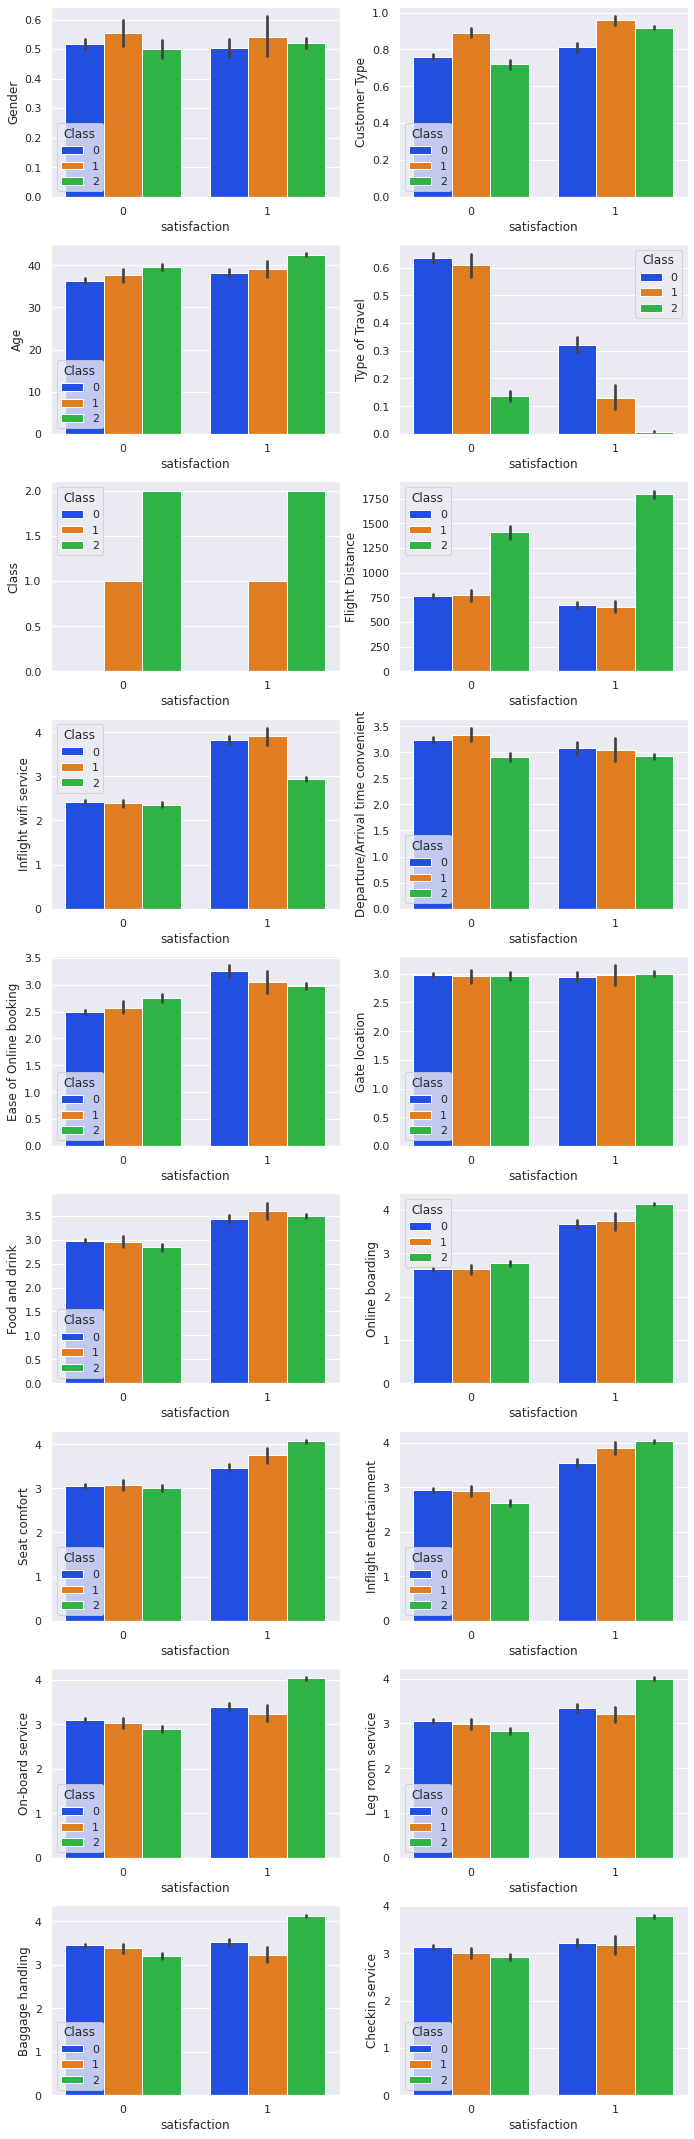

In [ ]:
detail_barplot("Class")

# Preparing for Machine Learning:

##`StratifiedShuffleSplit` :

### split into train and test set:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split function returns indexes
for train_index, test_index in stratified_split.split(df_train,df_train['Gender']):
    df_train_trainset = df_train.iloc[train_index]
    df_train_testset= df_train.iloc[test_index]

## Data cleaning and processing

We use KNN for data processing (preparation for ML).



In [ ]:
imputer = KNNImputer(n_neighbors=10, weights="uniform") # inherit from KNNImputer

# x_train
x_train = df_train_trainset.iloc[:,:-1]
x_train = imputer.fit_transform(x_train)
y_train = df_train_trainset.iloc[:,-1].to_numpy() # df to numpy

# x_test
x_test = df_train_testset.iloc[:,:-1]
x_test = imputer.fit_transform(x_test)
y_test = df_train_testset.iloc[:,-1].to_numpy()  # df to numpy

# MinMaxScaler normalizatsiya qilish
x_scaler = MinMaxScaler() # normalizatsiya qilish
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

# 💠Modellarni o`qitamiz:

In [ ]:
# Models:
 
rf_clf = RandomForestClassifier() 
lda_clf = LinearDiscriminantAnalysis()
svm_clf = SVC()
logisreg_clf = LogisticRegression()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()
GNB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()

# we put each model in clf_list(classifierList).:
clf_list = [rf_clf,lda_clf,svm_clf,logisreg_clf,GB_clf,XGB_clf,GNB_clf, DT_clf]
clf_name_list = ['Random_Forest','LDA','SupportVectorMachine','LogisticRegression','GradientBoosting','XGBoost','GaussianNaiveBayes','DecisionTreeClassifier']

# Modellarni uqitamiz:
for clf in clf_list:
    clf.fit(x_train,y_train)

## Natijalarni ko`rsatish:

In [ ]:
train_acc_list = [] # list of errors for train set
test_acc_list = [] # list of errors for the test set

for clf, name in zip(clf_list, clf_name_list): # use of for loop for two lists: ==>> zip function
    
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    
    print('***************************************************************************')
    print(name,': \n')

    print('Training natijalari:')
    print(classification_report(y_train, y_pred_train,
                                    target_names=['Neytral yoki norozilik', 'satisfaction']))
    print('Testing natijalari:')
    print(classification_report(y_test, y_pred_test,
                                    target_names=['Neytral yoki norozilik', 'satisfaction']))
        
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))

***************************************************************************
Random_Forest : 

Training natijalari:
                        precision    recall  f1-score   support

Neytral yoki norozilik       1.00      1.00      1.00      3978
          satisfaction       1.00      1.00      1.00      4022

              accuracy                           1.00      8000
             macro avg       1.00      1.00      1.00      8000
          weighted avg       1.00      1.00      1.00      8000

Testing natijalari:
                        precision    recall  f1-score   support

Neytral yoki norozilik       0.92      0.97      0.95      1022
          satisfaction       0.97      0.92      0.94       978

              accuracy                           0.94      2000
             macro avg       0.94      0.94      0.94      2000
          weighted avg       0.94      0.94      0.94      2000

***************************************************************************
LDA : 

Trainin

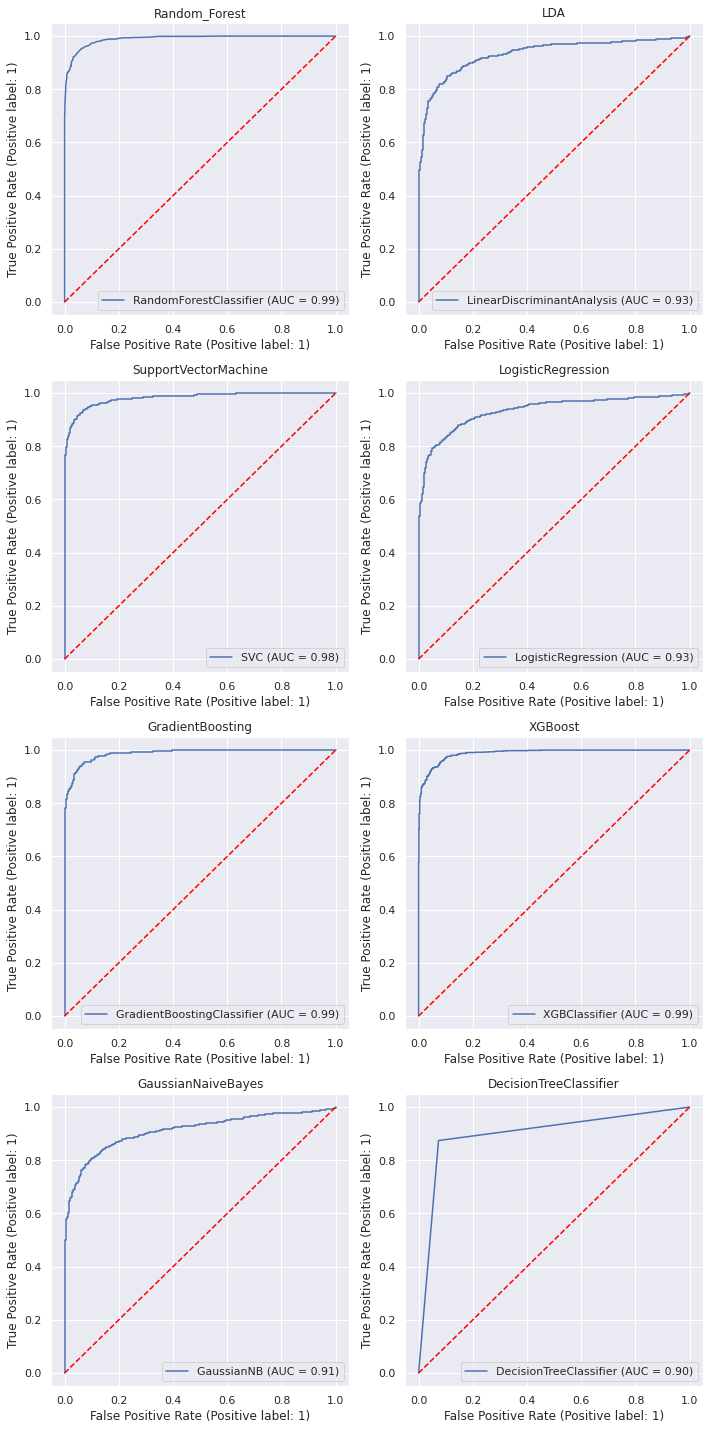

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
line = np.linspace(0,1)


sns.set(font_scale=1.0)
for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    plot_roc_curve(clf, x_test, y_test, ax=ax) 
    ax.plot(line,line, color='red', linestyle='dashed')
    ax.title.set_text(name)
fig.tight_layout(pad=1.0)
plt.show()

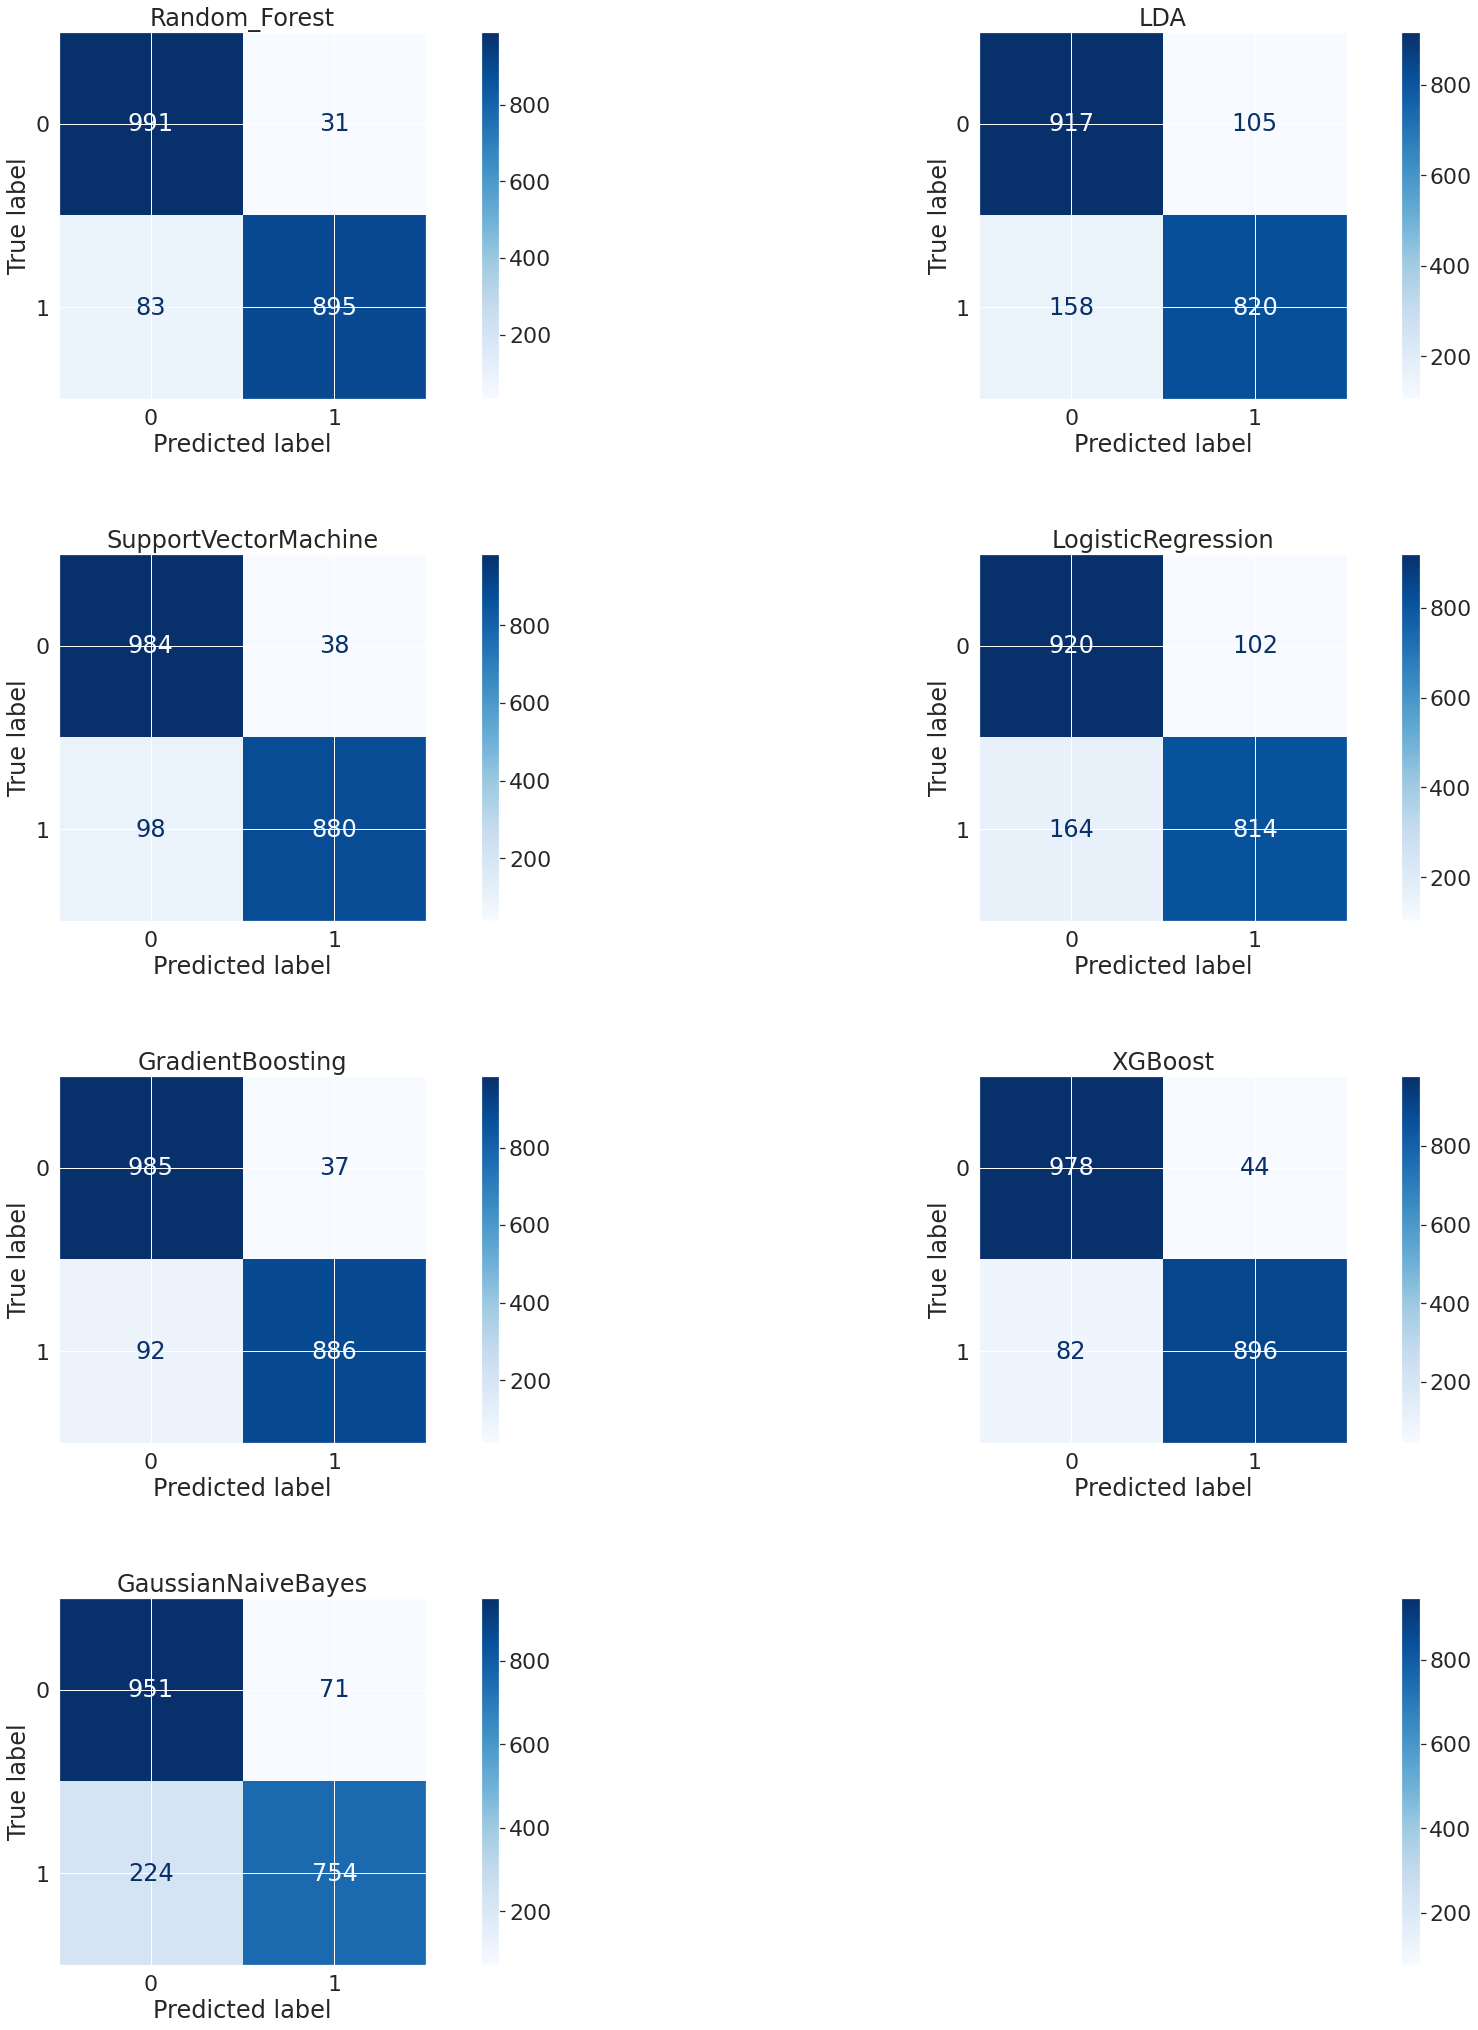

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,30))

sns.set(font_scale=2)

for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    # y_predict = clf.predict(x_test)
    plot_confusion_matrix(clf, x_test, y_test, ax=ax, cmap='Blues',
                          display_labels=['0', '1'])
    # ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
    ax.title.set_text(name)
    plt.grid(False)
fig.tight_layout(pad=3)
fig.delaxes(axes[3][1])
plt.show()

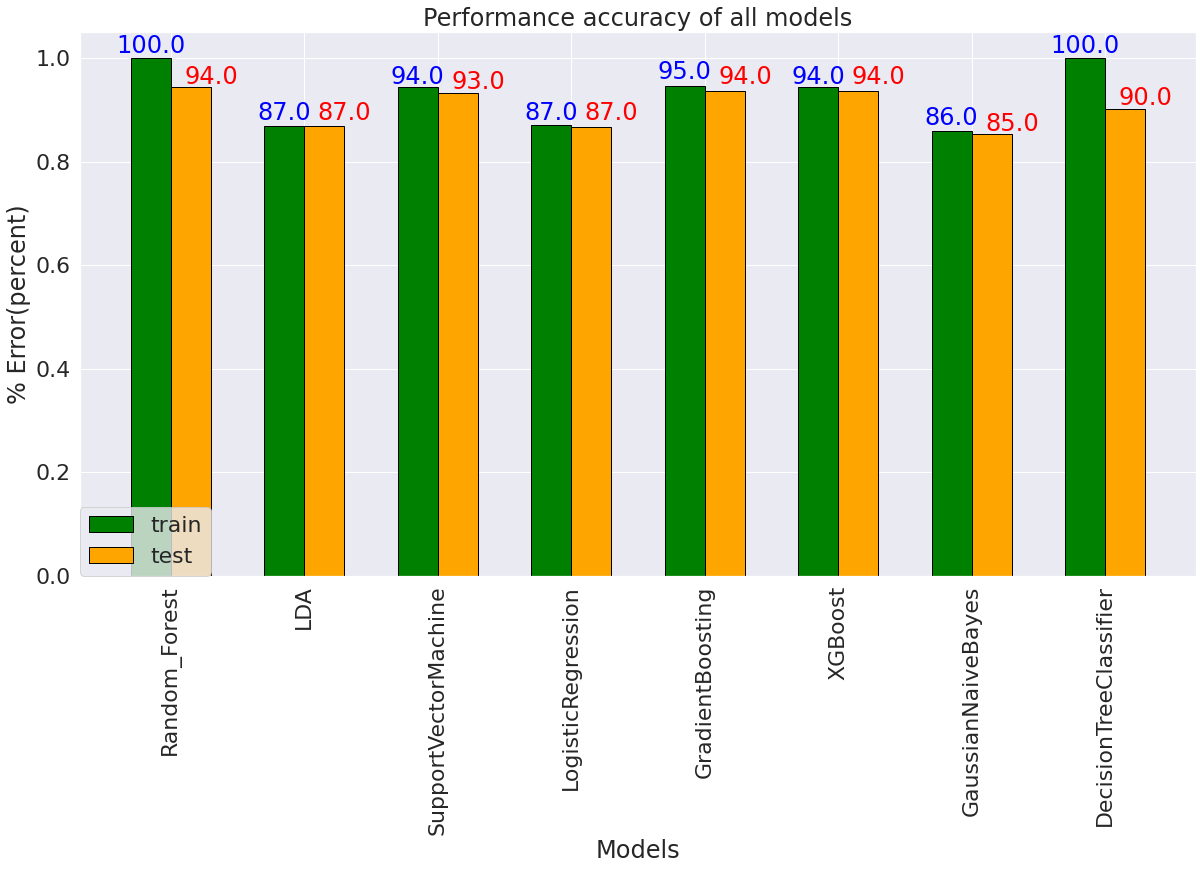

In [ ]:
plt.figure(figsize=(20,10))

n = np.arange(8)
width = 0.3

plt.bar(n, train_acc_list, color = 'green',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i].round(2)+0.01,train_acc_list[i].round(2)*100,
                 ha = 'center',color = 'blue')

plt.bar(n + width, test_acc_list, color = 'orange',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i].round(2)+0.01,test_acc_list[i].round(2)*100,color = 'red')

plt.xlabel("Models")
plt.ylabel("% Error(percent)")
plt.title("Performance accuracy of all models")
  
plt.xticks(n + width/2,clf_name_list,rotation=90)
plt.legend(loc =(0,0))
  
plt.show()

##Very well👍😎, the highest test accuracy can reach 94%.



With this value, we check which values are most related to the `satisfaction` column:

In [ ]:
clf_list[0].feature_importances_

array([0.00555592, 0.03324598, 0.03616296, 0.10373908, 0.12051509,
       0.03912455, 0.12998919, 0.01969063, 0.0415864 , 0.01714394,
       0.01276405, 0.15864558, 0.03377581, 0.05092955, 0.02919281,
       0.03417191, 0.02585292, 0.02510186, 0.02219486, 0.03010598,
       0.01451038, 0.01600057])

In [ ]:
clf_list

[RandomForestClassifier(),
 LinearDiscriminantAnalysis(),
 SVC(),
 LogisticRegression(),
 GradientBoostingClassifier(),
 XGBClassifier(),
 GaussianNB(),
 DecisionTreeClassifier()]

## Random Forest

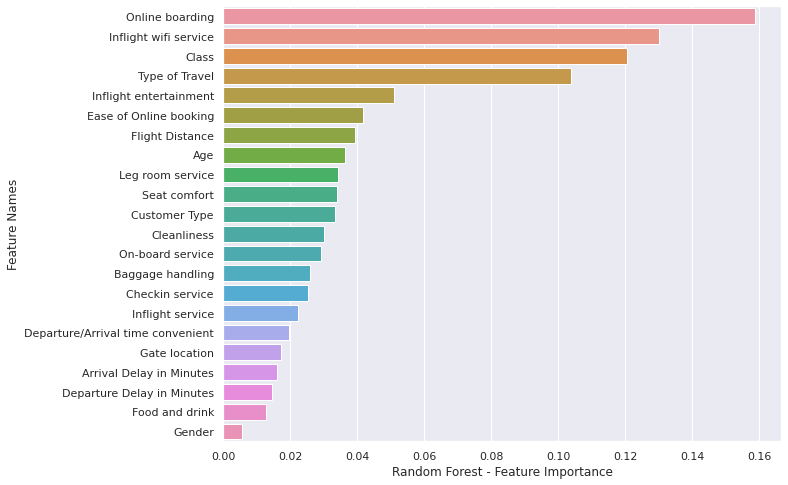

In [ ]:
feature_importance = clf_list[0].feature_importances_ # random forest
col_name = df_train.iloc[:,:-1].columns
rf_fi ={'feature_names':col_name,'feature_importance':feature_importance} # dict

df_plt = pd.DataFrame(rf_fi) # created data frame
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

sns.set(font_scale=1)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('Random Forest - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

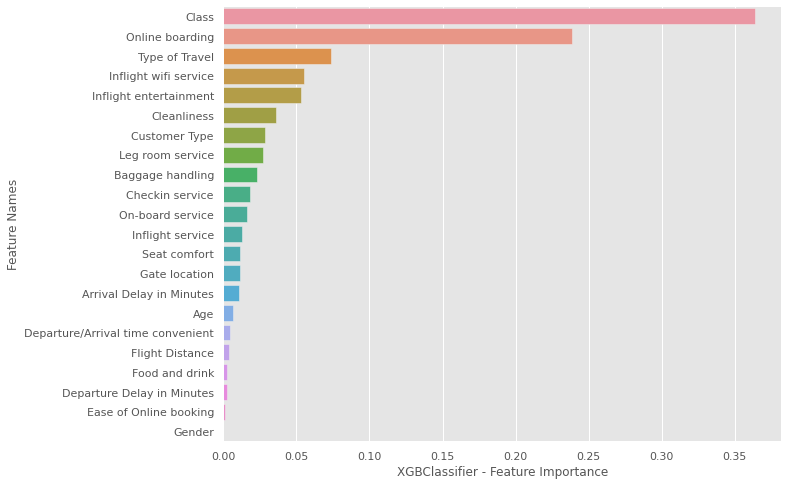

In [ ]:
feature_importance = clf_list[-3].feature_importances_
col_name = df_train.iloc[:,:-1].columns
xgbs_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(xgbs_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('XGBClassifier - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

## GradientBoostingClassifier

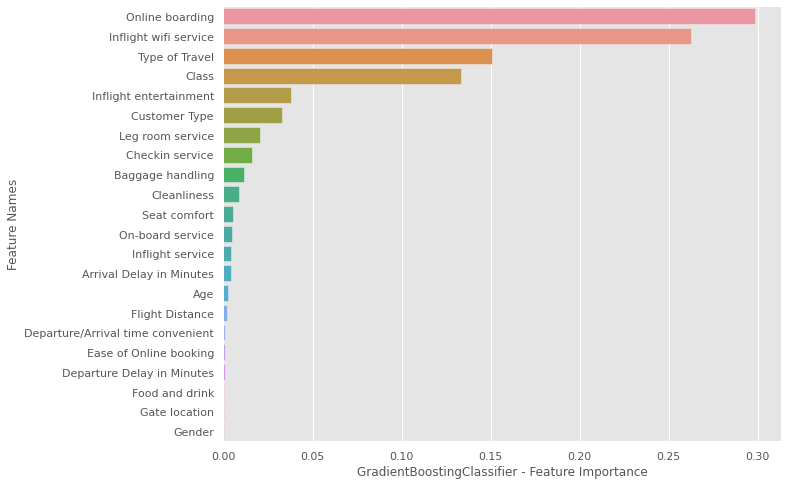

In [ ]:
feature_importance = clf_list[-4].feature_importances_
col_name = df_train.iloc[:,:-1].columns
gb_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(gb_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('GradientBoostingClassifier - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

## Thank you. I hope it will be useful!🌼